In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets pr
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Compute precision-recall curve




# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read the data
df_dataset = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-14-2018.csv")

In [3]:
# display data
df_dataset

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  14/02/2018 08:31:01      112641719             3   
1               0         0  14/02/2018 08:33:50      112641466             3   
2               0         0  14/02/2018 08:36:39      112638623             3   
3              22         6  14/02/2018 08:40:13        6453966            15   
4              22         6  14/02/2018 08:40:23        8804066            14   
...           ...       ...                  ...            ...           ...   
1048570        80         6  14/02/2018 10:53:23       10156986             5   
1048571        80         6  14/02/2018 10:53:33            117             2   
1048572        80         6  14/02/2018 10:53:28        5095331             3   
1048573        80         6  14/02/2018 10:53:28        5235511             3   
1048574       443         6  14/02/2018 10:53:28        5807256             6   

         Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                  10             1239             2273              744   
4                  11             1143             2209              744   
...               ...              ...              ...              ...   
1048570             5             1089             1923              587   
1048571             0                0                0                0   
1048572             1                0                0                0   
1048573             1                0                0                0   
1048574             4              327              145              245   

         Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                      0  ...                 0          0.0         0.0   
1                      0  ...                 0          0.0         0.0   
2                      0  ...                 0          0.0         0.0   
3                      0  ...                32          0.0         0.0   
4                      0  ...                32          0.0         0.0   
...                  ...  ...               ...          ...         ...   
1048570                0  ...                20          0.0         0.0   
1048571                0  ...                20          0.0         0.0   
1048572                0  ...                20          0.0         0.0   
1048573                0  ...                20          0.0         0.0   
1048574                0  ...                20     291569.0         0.0   

         Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min  \
0                 0           0  56320859.5  139.300036  56320958  56320761   
1                 0           0  56320733.0  114.551299  56320814  56320652   
2                 0           0  56319311.5  301.934596  56319525  56319098   
3                 0           0         0.0    0.000000         0         0   
4                 0           0         0.0    0.000000         0         0   
...             ...         ...         ...         ...       ...       ...   
1048570           0           0         0.0    0.000000         0         0   
1048571           0           0         0.0    0.000000         0         0   
1048572           0           0         0.0    0.000000         0         0   
1048573           0           0         0.0    0.000000         0         0   
1048574      291569      291569   5515650.0    0.000000   5515650   5515650   

          Label  
0        Benign  
1        Benign  
2        Benign  
3        Benign  
4        Benign  
...         ...  
1048570  Benign  
1048571  Benign  
1048572  Benign  
1048573  Benign  
1048574  Benign  

[1048575 rows x 80 columns]

In [4]:
# feature information
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [5]:
# replace +ve and -ve infinity with NaN
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
# drop missing values
df_dataset.dropna(inplace=True)

In [7]:
df_dataset["Label"].value_counts()

Benign            663808
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [8]:
df_dataset.replace(to_replace=["FTP-BruteForce", "SSH-Bruteforce"], value="Malicious", inplace=True)

In [9]:
df_dataset["Label"].value_counts()

Benign       663808
Malicious    380943
Name: Label, dtype: int64

In [10]:
print(df_dataset.duplicated().sum())

225625


In [11]:
df_dataset.drop_duplicates(inplace=True)

In [12]:
print(df_dataset.duplicated().sum())

0


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.utils import class_weight

RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = df_dataset
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [14]:
df1 = df[df["Label"] == "Benign"][:156668]
df2 = df[df["Label"] == "Malicious"][:156668]
df_equal = pd.concat([ df1,df2], axis =0)

In [15]:
df_equal.replace(to_replace="Benign", value=0, inplace=True)
df_equal.replace(to_replace="Malicious", value=1, inplace=True)

In [16]:
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df_equal["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df_equal["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df_equal["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df_equal["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [17]:
train, test = train_test_split(df_equal, test_size=0.25, random_state=RANDOM_STATE_SEED)

In [18]:
# display columns
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [19]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235002 entries, 400277 to 238508
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           235002 non-null  int64  
 1   Protocol           235002 non-null  int64  
 2   Timestamp          235002 non-null  object 
 3   Flow Duration      235002 non-null  int64  
 4   Tot Fwd Pkts       235002 non-null  int64  
 5   Tot Bwd Pkts       235002 non-null  int64  
 6   TotLen Fwd Pkts    235002 non-null  int64  
 7   TotLen Bwd Pkts    235002 non-null  int64  
 8   Fwd Pkt Len Max    235002 non-null  int64  
 9   Fwd Pkt Len Min    235002 non-null  int64  
 10  Fwd Pkt Len Mean   235002 non-null  float64
 11  Fwd Pkt Len Std    235002 non-null  float64
 12  Bwd Pkt Len Max    235002 non-null  int64  
 13  Bwd Pkt Len Min    235002 non-null  int64  
 14  Bwd Pkt Len Mean   235002 non-null  float64
 15  Bwd Pkt Len Std    235002 non-null  float64
 1

In [20]:
min_max_scaler = MinMaxScaler().fit(train[['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']])

In [21]:
numerical_columns = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [22]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [23]:
train

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
400277        53        17  14/02/2018 08:30:33       0.999869      0.000000   
456333       443         6  14/02/2018 12:41:01       0.999997      0.046862   
528808       443         6  14/02/2018 10:50:59       0.999999      0.003056   
396843        80         6  14/02/2018 12:04:21       0.999908      0.000815   
19812         21         6  14/02/2018 10:43:20       0.999869      0.000000   
...          ...       ...                  ...            ...           ...   
192466        22         6  14/02/2018 02:14:20       0.999870      0.004279   
417700        53        17  14/02/2018 11:10:27       0.999869      0.000000   
421420        80         6  14/02/2018 12:22:57       0.999876      0.000611   
270904        22         6  14/02/2018 02:52:37       0.999870      0.004279   
238508        22         6  14/02/2018 02:37:00       0.999870      0.004279   

        Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
400277      0.000112     4.318070e-06         0.000008         0.000574   
456333      0.054003     2.984137e-04         0.050995         0.003352   
528808      0.001789     1.014163e-04         0.000293         0.003445   
396843      0.000447     4.668184e-07         0.000000         0.000016   
19812       0.000112     0.000000e+00         0.000000         0.000000   
...              ...              ...              ...              ...   
192466      0.002236     2.268738e-04         0.000205         0.009932   
417700      0.000112     8.986255e-06         0.000016         0.001195   
421420      0.000447     1.132035e-05         0.000018         0.001505   
270904      0.002460     2.231392e-04         0.000205         0.009932   
238508      0.002460     2.250065e-04         0.000205         0.009932   

        Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
400277         0.031463  ...               0.2     0.000000    0.000000   
456333         0.000000  ...               0.5     0.011571    0.010041   
528808         0.000000  ...               0.5     0.025217    0.021378   
396843         0.000000  ...               0.5     0.000786    0.000001   
19812          0.000000  ...               1.0     0.000000    0.000000   
...                 ...  ...               ...          ...         ...   
192466         0.000000  ...               0.8     0.000000    0.000000   
417700         0.065476  ...               0.2     0.000000    0.000000   
421420         0.000000  ...               0.5     0.000000    0.000000   
270904         0.000000  ...               0.8     0.000000    0.000000   
238508         0.000000  ...               0.8     0.000000    0.000000   

        Active Max  Active Min  Idle Mean      Idle Std  Idle Max  Idle Min  \
400277    0.000000    0.000000   0.000000  0.000000e+00   0.00000  0.000000   
456333    0.010806    0.002457   0.000172  1.808055e-06   0.00006  0.004601   
528808    0.023299    0.006154   0.000172  2.263203e-06   0.00006  0.004615   
396843    0.000394    0.001244   0.000030  2.012279e-10   0.00001  0.000795   
19812     0.000000    0.000000   0.000000  0.000000e+00   0.00000  0.000000   
...            ...         ...        ...           ...       ...       ...   
192466    0.000000    0.000000   0.000000  0.000000e+00   0.00000  0.000000   
417700    0.000000    0.000000   0.000000  0.000000e+00   0.00000  0.000000   
421420    0.000000    0.000000   0.000000  0.000000e+00   0.00000  0.000000   
270904    0.000000    0.000000   0.000000  0.000000e+00   0.00000  0.000000   
238508    0.000000    0.000000   0.000000  0.000000e+00   0.00000  0.000000   

        Label  
400277      0  
456333      0  
528808      0  
396843      0  
19812       1  
...       ...  
192466      1  
417700      0  
421420      0  
270904      1  
238508      1  

[235002 rows x 80 columns]

In [24]:
train.drop(['Timestamp'], axis=1,inplace=True)
test.drop(['Timestamp'],axis=1,inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235002 entries, 400277 to 238508
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           235002 non-null  int64  
 1   Protocol           235002 non-null  int64  
 2   Flow Duration      235002 non-null  float64
 3   Tot Fwd Pkts       235002 non-null  float64
 4   Tot Bwd Pkts       235002 non-null  float64
 5   TotLen Fwd Pkts    235002 non-null  float64
 6   TotLen Bwd Pkts    235002 non-null  float64
 7   Fwd Pkt Len Max    235002 non-null  float64
 8   Fwd Pkt Len Min    235002 non-null  float64
 9   Fwd Pkt Len Mean   235002 non-null  float64
 10  Fwd Pkt Len Std    235002 non-null  float64
 11  Bwd Pkt Len Max    235002 non-null  float64
 12  Bwd Pkt Len Min    235002 non-null  float64
 13  Bwd Pkt Len Mean   235002 non-null  float64
 14  Bwd Pkt Len Std    235002 non-null  float64
 15  Flow Byts/s        235002 non-null  float64
 1

In [26]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

In [27]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 156668
Malicious: 156668
---------------
Training set:

Benign: 117524
Malicious: 117478
---------------
Test set:

Benign: 39144
Malicious: 39190


In [28]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
#y_train = np.array(train.pop("Timestamp"))
X_train = train.values

In [29]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test.pop("Timestamp"))
X_test = test.values

SVM Accuracy: 0.9998978732095897
SVM Precision: 0.9997959079544875
SVM Recall: 1.0
SVM F1-score: 0.9998979435627903
SVM Confusion Matrix: [[39136     8]
 [    0 39190]]


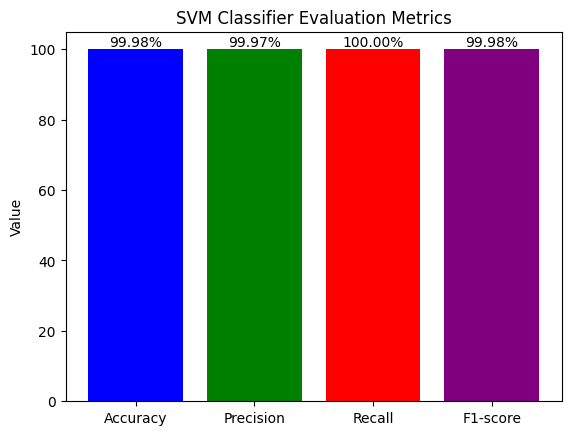

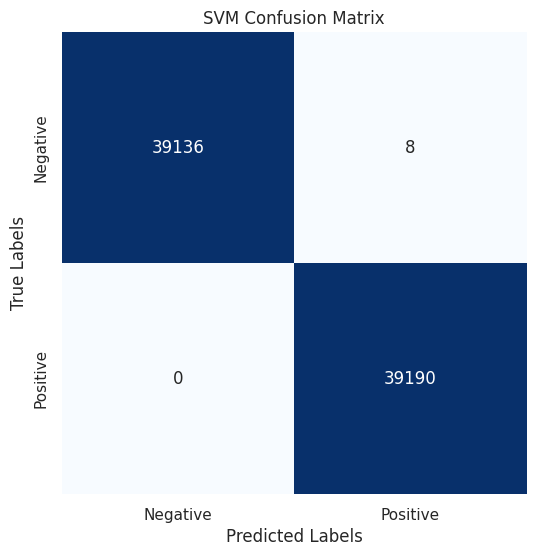

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
svm_preds = svm_model.predict(X_test)

# Evaluate the SVM model
svm_acc = accuracy_score(y_test, svm_preds)
svm_prec = precision_score(y_test, svm_preds)
svm_rec = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

# Print the evaluation metrics for the SVM model
print('SVM Accuracy:', svm_acc)
print('SVM Precision:', svm_prec)
print('SVM Recall:', svm_rec)
print('SVM F1-score:', svm_f1)
print('SVM Confusion Matrix:', svm_cm)

import matplotlib.pyplot as plt
# Define the evaluation metrics of the DT classifier
svm_acc = 99.98
svm_prec = 99.97
svm_rec = 100
svm_f1 = 99.98


# Plot the evaluation metrics bar graph
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [svm_acc, svm_prec, svm_rec, svm_f1]
colors = ['blue', 'green', 'red', 'purple']
# Add text annotations to each bar
for i, val in enumerate(values):
    plt.text(i, val+0.01, f'{val:.2f}%', ha='center', va='bottom')

plt.bar(labels, values, color=colors)
plt.title('SVM Classifier Evaluation Metrics')
plt.ylabel('Value')
plt.show()


# Plot the confusion matrix
sns.set()
plt.figure(figsize=(6,6))
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix')
plt.show()


Accuracy Score:  0.9999489366047949
Precision: 0.9998979435627903
Recall Score:  1.0
F1 Score:  0.9999489691773831
Confusion Matrix:
 [[39140     4]
 [    0 39190]]


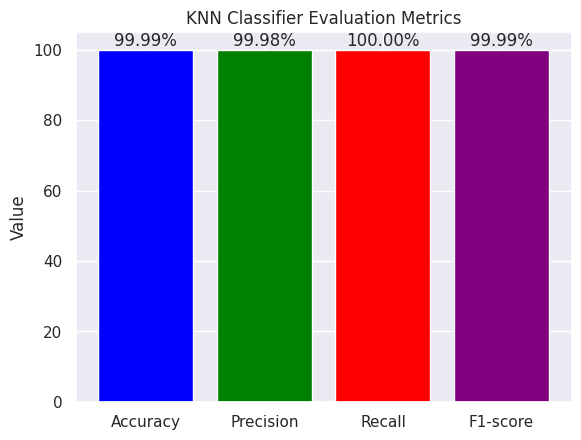

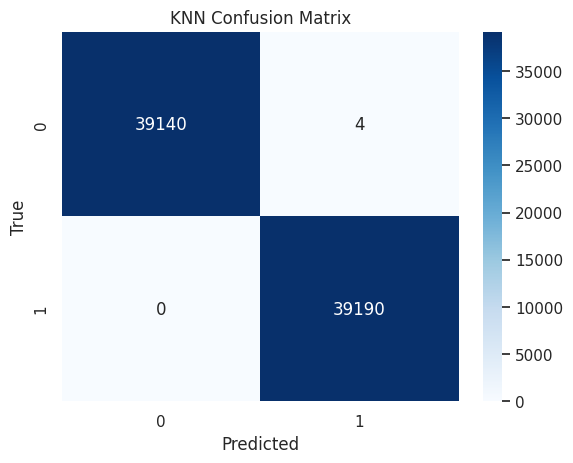

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
knn_preds = knn_model.predict(X_test)

# Evaluate the KNN model
knn_acc = accuracy_score(y_test, knn_preds)
knn_prec = precision_score(y_test, knn_preds)
knn_rec = recall_score(y_test, knn_preds)
knn_f1 = f1_score(y_test, knn_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

# Show the confusion matrix, recall, f1-score, and accuracy
print("Accuracy Score: ", knn_acc)
print('Precision:', knn_prec)
print("Recall Score: ", knn_rec)
print("F1 Score: ", knn_f1)
print("Confusion Matrix:\n", knn_cm)
import matplotlib.pyplot as plt
# Define the evaluation metrics of the DT classifier
knn_acc = 99.99
knn_prec = 99.98
knn_rec = 100
knn_f1 = 99.99

# Plot the evaluation metrics bar graph
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [knn_acc, knn_prec, knn_rec, knn_f1]
colors = ['blue', 'green', 'red', 'purple']
# Add text annotations to each bar
for i, val in enumerate(values):
    plt.text(i, val+0.01, f'{val:.2f}%', ha='center', va='bottom')

plt.bar(labels, values, color=colors)
plt.title('KNN Classifier Evaluation Metrics')
plt.ylabel('Value')
plt.show()

# Plot the confusion matrix
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





DT Accuracy: 1.0
DT Precision: 1.0
DT Recall: 1.0
DT F1-score: 1.0
DT Confusion Matrix: [[39144     0]
 [    0 39190]]


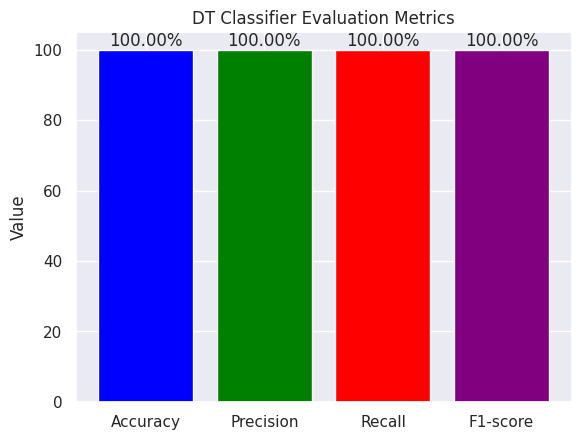

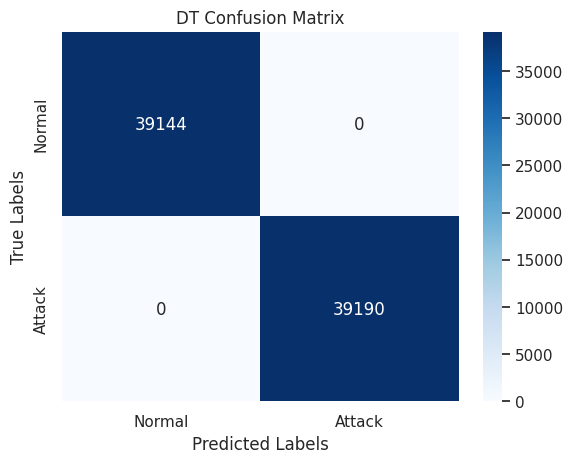

In [32]:
# Train the DT model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
dt_preds = dt_model.predict(X_test)

# Evaluate the DT model
dt_acc = accuracy_score(y_test, dt_preds)
dt_prec = precision_score(y_test, dt_preds)
dt_rec = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
dt_cm = confusion_matrix(y_test, dt_preds)

print('DT Accuracy:', dt_acc)
print('DT Precision:', dt_prec)
print('DT Recall:', dt_rec)
print('DT F1-score:', dt_f1)
print('DT Confusion Matrix:', dt_cm)
import matplotlib.pyplot as plt
# Define the evaluation metrics of the DT classifier
dt_acc = 100
dt_prec = 100
dt_rec = 100
dt_f1 = 100

# Plot the evaluation metrics bar graph
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [dt_acc, dt_prec, dt_rec, dt_f1]
colors = ['blue', 'green', 'red', 'purple']
# Add text annotations to each bar
for i, val in enumerate(values):
    plt.text(i, val+0.01, f'{val:.2f}%', ha='center', va='bottom')

plt.bar(labels, values, color=colors)
plt.title('DT Classifier Evaluation Metrics')
plt.ylabel('Value')
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
dt_cm = confusion_matrix(y_test, dt_preds)

# Plot the confusion matrix as a heatmap
sns.heatmap(dt_cm, cmap='Blues', annot=True, fmt='g', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Best number of trees: 1
rf Accuracy: 0.9999872341511987
rf Precision: 0.9999744839376388
rf Recall: 1.0
rf F1-score: 0.9999872418060499
rf Confusion Matrix: [[39143     1]
 [    0 39190]]


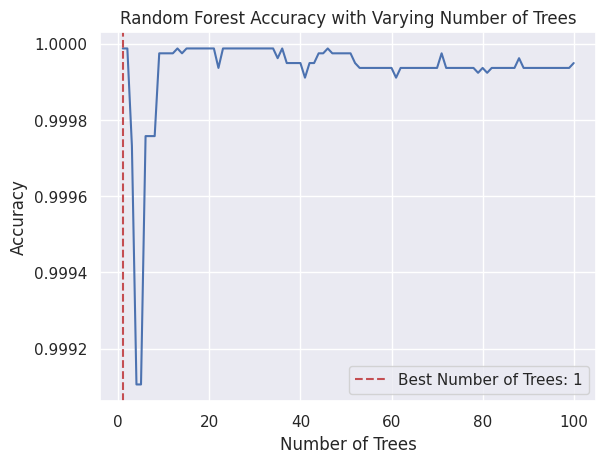

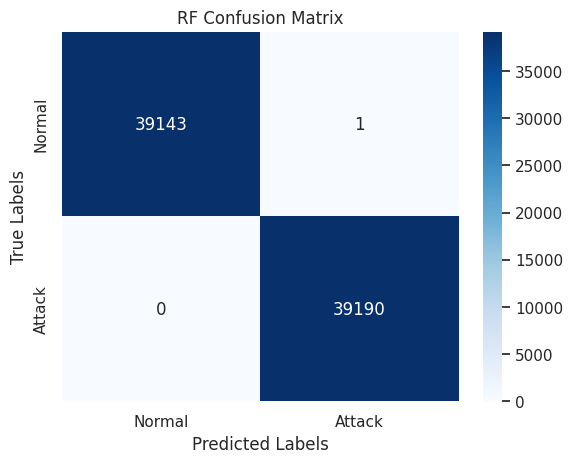

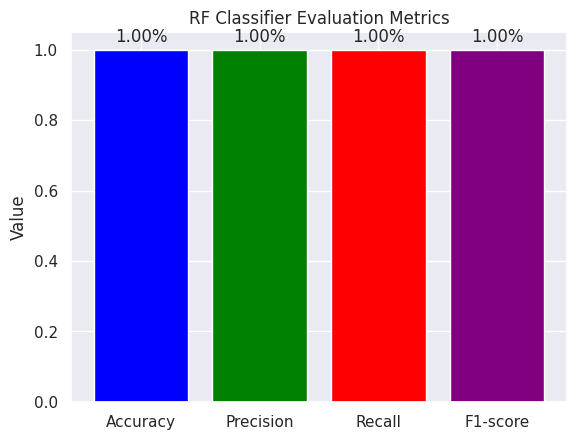

In [33]:
# Train the RF model
rf_accs = []
rf_models = []
for n in range(1, 101):
    rf_model = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_models.append(rf_model)
    rf_preds = rf_model.predict(X_test)
    rf_accs.append(accuracy_score(y_test, rf_preds))

# Find the number of trees with the highest accuracy
best_n = np.argmax(rf_accs) + 1
print('Best number of trees:', best_n)

# Make predictions on the testing set using the best RF model
rf_model = rf_models[best_n-1]
rf_preds = rf_model.predict(X_test)

# Evaluate the RF model
rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

print('rf Accuracy:', rf_acc)
print('rf Precision:', rf_prec)
print('rf Recall:', rf_rec)
print('rf F1-score:', rf_f1)
print('rf Confusion Matrix:', rf_cm)

# Create the accuracy curve graph
plt.plot(range(1, 101), rf_accs)
plt.axvline(x=best_n, linestyle='--', color='r', label='Best Number of Trees: {}'.format(best_n))
plt.title('Random Forest Accuracy with Varying Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Create the confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot the confusion matrix as a heatmap
sns.heatmap(rf_cm, cmap='Blues', annot=True, fmt='g', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Plot the evaluation metrics bar graph
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [rf_acc, rf_prec, rf_rec, rf_f1]
colors = ['blue', 'green', 'red', 'purple']
# Add text annotations to each bar
for i, val in enumerate(values):
    plt.text(i, val+0.01, f'{val:.2f}%', ha='center', va='bottom')

plt.bar(labels, values, color=colors)
plt.title('RF Classifier Evaluation Metrics')
plt.ylabel('Value')
plt.show()




Text(0, 0.5, 'Value')

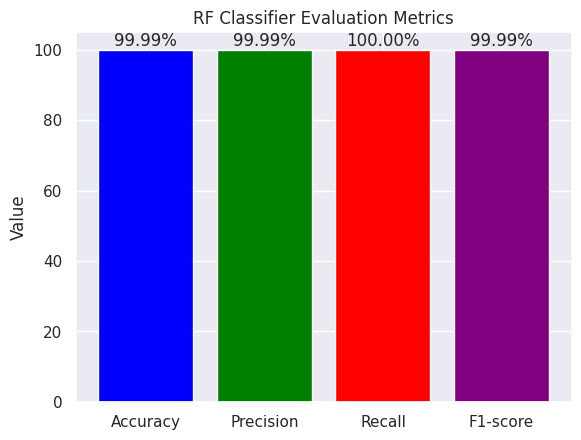

In [34]:
import matplotlib.pyplot as plt
# Define the evaluation metrics of the DT classifier
rf_acc = 99.99
rf_prec = 99.99
rf_rec = 100
rf_f1 = 99.99
# Create a bar plot of the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [rf_acc, rf_prec, rf_rec, rf_f1]
colors = ['blue', 'green', 'red', 'purple']
plt.bar(labels, values, color=colors)

# Add text annotations to each bar
for i, val in enumerate(values):
    plt.text(i, val+0.01, f'{val:.2f}%', ha='center', va='bottom')

# Set the title and labels
plt.title('RF Classifier Evaluation Metrics')
plt.ylabel('Value')